In [8]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("../data/car_insurance.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [5]:
df.dtypes

id                       int64
age                      int64
gender                   int64
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

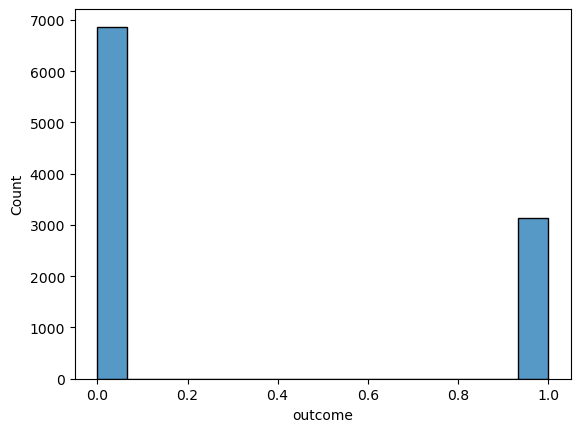

In [9]:
# Target variable
sns.histplot(data=df['outcome'])
plt.show()

In [10]:
# fill in missing values - annual milage
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].median())

In [11]:
# fill in missing values - credit score
upper_class_median = df[df['income'] == 'upper class']['credit_score'].median()
middle_class_median = df[df['income'] == 'middle class']['credit_score'].median()
poverty_class_median = df[df['income'] == 'poverty']['credit_score'].median()
working_class_median = df[df['income'] == 'working class']['credit_score'].median()

df.loc[(df[(df['income'] == 'poverty') & df['credit_score'].isnull()].index),'credit_score'] = poverty_class_median
df.loc[(df[(df['income'] == 'working class') & df['credit_score'].isnull()].index),'credit_score'] = working_class_median
df.loc[(df[(df['income'] == 'middle class') & df['credit_score'].isnull()].index),'credit_score'] = middle_class_median 
df.loc[(df[(df['income'] == 'upper class') & df['credit_score'].isnull()].index),'credit_score'] = upper_class_median 

In [13]:
# function to calculate accuracy
def get_accuracy(model, actual_response):
    # Get the predicted responses
    predicted_response = np.round(model.predict())

    # Create outcomes as a DataFrame of both Series
    outcomes = pd.DataFrame(
        {"actual_response" : actual_response,
         "predicted_response": predicted_response
    })
    
    # Calculate the confusion matrix conf_matrix
    conf_matrix = model.pred_table()

    # Extract TN, TP, FN and FP from conf_matrix
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]

    # Calculate and print the accuracy
    return (TN + TP) / (TN + TP + FN + FP)


In [14]:
features_list = list(df.columns)[1:-2]
accuracy_list = []

for feature in features_list:
    model = logit('outcome~'+f'{feature}', data=df).fit()
    accuracy_list.append(get_accuracy(model, df['outcome']))
    
results_df = pd.DataFrame(
    {"feature" : features_list,
     "accuracy": accuracy_list
})

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564566
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [15]:
results_df

,feature,accuracy
0,age,0.7747
1,gender,0.6867
2,driving_experience,0.7771
3,education,0.6867
4,income,0.7425
5,credit_score,0.7116
6,vehicle_ownership,0.7351
7,vehicle_year,0.6867
8,married,0.6867
9,children,0.6867


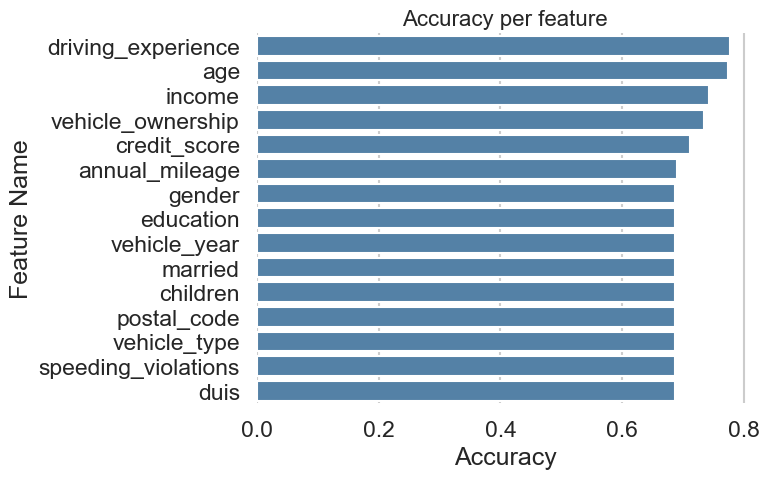

In [18]:
#create horizontal bar chart
sns.barplot(y="feature", x="accuracy",  data=results_df, 
            color='steelblue', 
            orient='h', 
           order=results_df.sort_values('accuracy',ascending = False).feature)

#add plot title
plt.title('Accuracy per feature', fontsize=16)
#add axis labels
plt.xlabel('Accuracy')
plt.ylabel('Feature Name')
sns.despine(left=True, bottom=True)
sns.set_context("talk")
sns.set_style("whitegrid")
plt.show()

In [19]:
idx = results_df["accuracy"].idxmax()
best_feature_df = pd.DataFrame({
    "best_feature": [results_df["feature"][idx]],
    "best_accuracy":  [results_df["accuracy"].max()]
})
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771
